[2017-08-10 19:18:01,364] Making new env: CartPole-v0


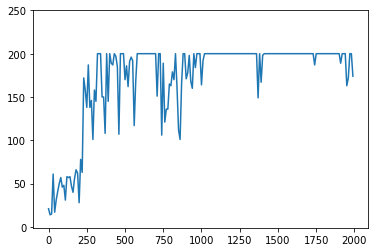

In [4]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# hypothesis p(a|s)
def prob(s, a):
    h = 1./(1.+np.exp(-np.dot(w.T, s)))
    if a==0:
        return h
    else:
        return 1-h
    
# hyperparams
ALPHA = .001 #learning rate for policy gradient
GAMA = .9 #discount
MAX_EPI = 2000

# variables
w = np.random.rand(4,1)
#w = np.array([  0.07361484,   2.06529216,   2.40575705,  13.57625866])
#w = w.reshape(4,1)
o = np.empty([4,1])
a = None

x_it = []
y_r = []

env = gym.make('CartPole-v0')

for epi in range(MAX_EPI):
    epi_o = []
    epi_a = []
    epi_r = []
    epi_pi = []
    o = env.reset()
    for t in range(200):
        #env.render()
        o = o.reshape((4,1))
        epi_o.append(o)
        epi_pi.append(prob(o, 0))
        action = 0 if np.random.random_sample()<epi_pi[-1] else 1
        #action = 0 if 0.5<=epi_pi[-1] else 1
        o, r, done, info = env.step(action)
        epi_a.append(action)
        epi_r.append(r)
        if done:
            break;
    if epi%10==0:
        x_it.append(epi)
        y_r.append(len(epi_o))
    #    print epi_a
    for t in range(len(epi_o)):
        s = epi_o[t]
        a = epi_a[t]
        pi = epi_pi[t]
        #pi = prob(o, 0)
        Gt = sum(epi_r[t:])
        ev = (1-pi)*s if a==0 else -pi*s
        #w += (ALPHA/(epi+1)) * Gt * ev
        w += ALPHA * Gt * ev
    
plt.plot(x_it, y_r)
plt.ylim((-1,250))
plt.show()
    



[2017-07-22 13:23:25,401] Making new env: CartPole-v0


Monte-Carlo policy gradient get reward 10.0
